In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
data = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/fixed_restart/SalishSea_1h_20180101_20180131_grid_T.nc')

In [5]:
time_slice = slice(288, 312)
data_time_slice= data.isel(time_counter = time_slice)

In [6]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted
    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'Jan18 {field}')
    axs.scatter(304 - 280, 446 - 430, marker = 'x', color = 'yellow')
    axs.scatter(304 - 280, 447 - 430, marker = 'x', color = 'yellow')
    axs.scatter(305 - 280, 446 - 430, marker = 'x', color = 'yellow')
    axs.scatter(305 - 280, 447 - 430, marker = 'x', color = 'yellow')

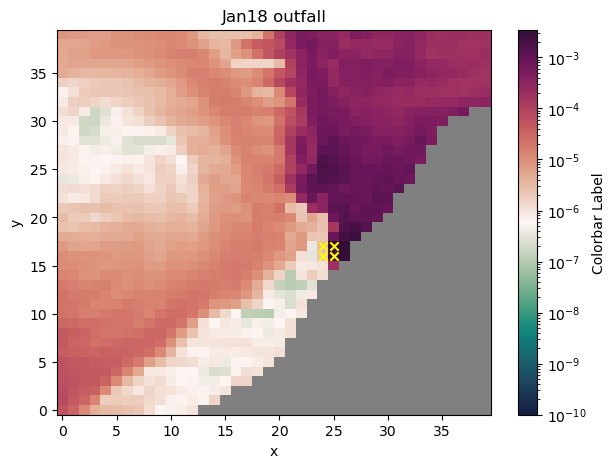

In [7]:
planview(data_time_slice, 'outfall', 23, 23, cm_vel)

In [8]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted
    data = base[field][it, :29, dep, 250+iz:350-iz]
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.invert_yaxis()
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'Jan18 {field}')
    if dep == 446:
        axs.scatter(304 - 280, 98, marker = 'x', color = 'yellow')
        axs.scatter(305 - 280, 76, marker = 'x', color = 'yellow')
    else:
        axs.scatter(304 - 280, 121, marker = 'x', color = 'yellow')
        axs.scatter(305 - 280, 98, marker = 'x', color = 'yellow')

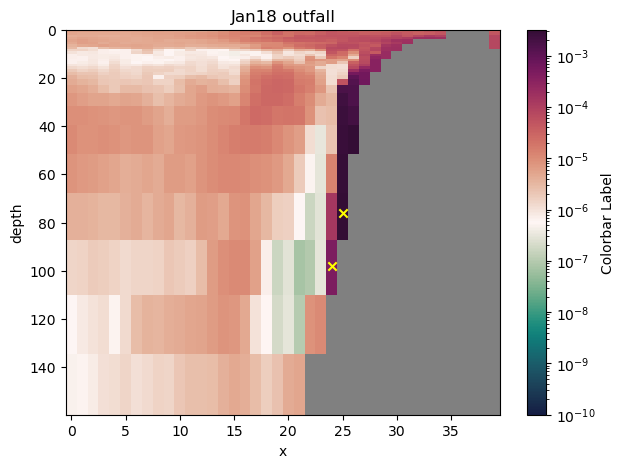

In [9]:
verticalview(data_time_slice, 'outfall', 23, 446, cm_vel)

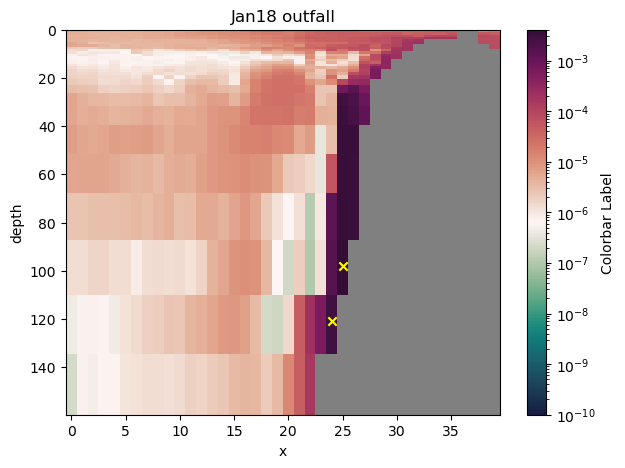

In [10]:
verticalview(data_time_slice, 'outfall', 23, 447, cm_vel)

In [11]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 30  # width of domain plotted
    data = base[field][it, :29, 400+iz:500-iz, dep]
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.invert_yaxis()  
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'Jan18 {field}')
    if dep == 304:
        axs.scatter(447 - 430, 121, marker = 'x', color = 'yellow')
        axs.scatter(446 - 430, 98, marker = 'x', color = 'yellow')
    else:
        axs.scatter(447 - 430, 98, marker = 'x', color = 'yellow')
        axs.scatter(446 - 430, 76, marker = 'x', color = 'yellow')

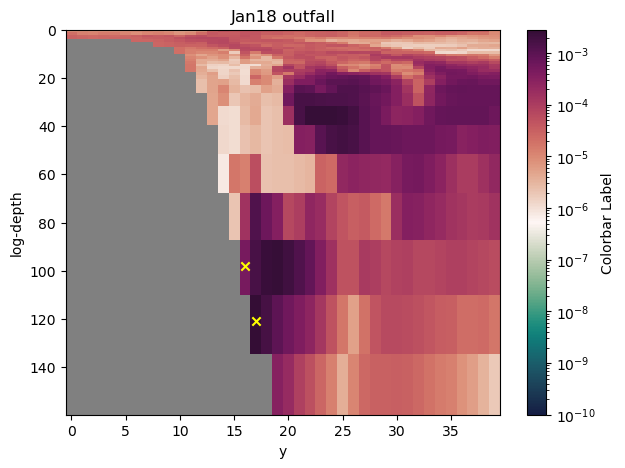

In [12]:
vertical_view_x(data_time_slice, 'outfall', 23, 304,  cm_vel)

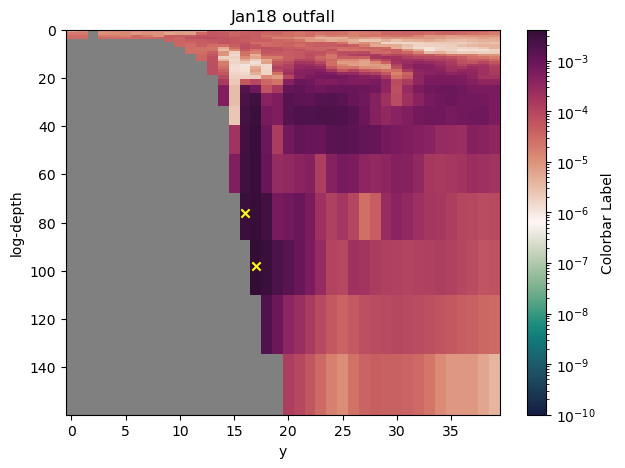

In [13]:
vertical_view_x(data_time_slice, 'outfall', 23, 305,  cm_vel)

In [14]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
data_slice = data.isel(time_counter = slice(288, 312), deptht = slice(0, 29), y = y_slice, x = x_slice)
def plotTimeSeriesLine(base, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(12, 5))
    sum_data = base[field].sum(dim = ["y", "x"])
    max_depth = sum_data.argmax(dim = 'deptht')
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=sum_data.values.min() + offset, vmax=sum_data.values.max() + offset)
    sum_data.plot(ax =axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    axs.set_title(f'Tands {field}')
    axs.plot(sum_data['time_counter'], sum_data['deptht'][max_depth], 'r-')
    axs.set_ylim(150, 0)
    plt.show()

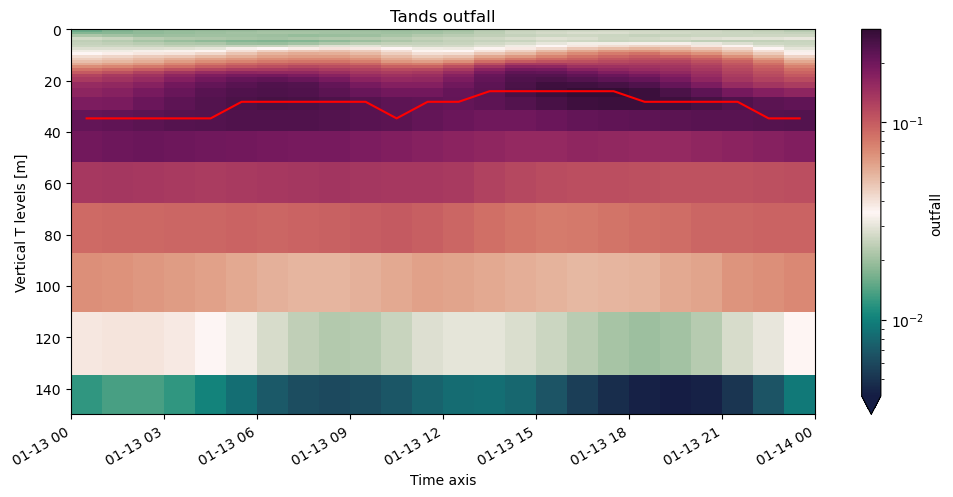

In [15]:
plotTimeSeriesLine(data_slice, 'outfall', cm_vel)